# Import

In [42]:
# Python
import numpy as np
import pandas as pd
import time
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# RDKit
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.rdMolDescriptors import GetHashedMorganFingerprint
from rdkit.Chem.Draw import rdMolDraw2D

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [43]:
from rdkit.Chem.Draw import IPythonConsole
from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))
def get_index_of_array_that_contain_1_in_any_position(list1):
    result = []
    for i, e in enumerate(list1):
        if e > 0:
            result.append(i)
    return result

In [44]:
def show_mol(d2d,mol,legend='',highlightAtoms=[]):
    d2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
    d2d.FinishDrawing()
    bio = BytesIO(d2d.GetDrawingText())
    return Image.open(bio)
def show_images(imgs,buffer=5):
    height = 0
    width = 0
    for img in imgs:
        height = max(height,img.height)
        width += img.width
    width += buffer*(len(imgs)-1)
    res = Image.new("RGBA",(width,height))
    x = 0
    for img in imgs:
        res.paste(img,(x,0))
        x += img.width + buffer
    return res
from io import BytesIO

# Function

In [45]:
annot_status = True
Line_status = 2
def Plot_heatmap(Text, text_model, ax_in, VALUE, Code, v_min, v_max, show_decimal):
    df = pd.read_excel("../../NEW/2023-11-10 CHON All_Score K_change.xlsx",sheet_name=f"{Text}")
    df2 = df.copy()#.drop(columns={"DataType", "MAE", "RMSE", "R2"})
    column_names = ["Model","Radius", "nBits", VALUE]
    df3 = df2.reindex(columns=column_names)
    df4 = df3[df3.Model == text_model]
    new_df = df4.pivot_table(index="Radius", columns="nBits", values=VALUE)
    g = sns.heatmap(new_df, linecolor="black", linewidth=Line_status, cmap=sns.color_palette(Code, as_cmap=True),
               vmin=v_min ,vmax=v_max,
               fmt=show_decimal, annot = annot_status
    ,                    ax=ax_in,cbar=False)
    g.invert_yaxis()
    g.get_xaxis().set_visible(False)
    g.set_title(f"{text_model}")
    return g
def Plot_heatmap_2(Text, text_model, ax_in, VALUE, Code, v_min, v_max, show_decimal):
    df = pd.read_excel("../../NEW/2023-11-10 CHON All_Score K_change.xlsx",sheet_name=f"{Text}")
    df2 = df.copy()#.drop(columns={"DataType", "MAE", "RMSE", "R2"})
    column_names = ["Model","Radius", "nBits", VALUE]
    df3 = df2.reindex(columns=column_names)
    df4 = df3[df3.Model == text_model]
    new_df = df4.pivot_table(index="Radius", columns="nBits", values=VALUE)
    g = sns.heatmap(new_df, linecolor="black", linewidth=Line_status, cmap=sns.color_palette(Code, as_cmap=True),
               vmin=v_min ,vmax=v_max,
               fmt=show_decimal, annot = annot_status
    ,                    ax=ax_in,cbar=False)
    g.invert_yaxis()
    #g.get_xaxis().set_visible(False)
    g.set_title(f"{text_model}")
    return g
def Plot_heatmap_final(Text, text_model, ax_in, axcb_in, VALUE, Code, v_min, v_max, show_decimal):
    df = pd.read_excel("../../NEW/2023-11-10 CHON All_Score K_change.xlsx",sheet_name=f"{Text}")
    df2 = df.copy()#.drop(columns={"DataType", "MAE", "RMSE", "R2"})
    column_names = ["Model","Radius", "nBits", VALUE]
    df3 = df2.reindex(columns=column_names)
    df4 = df3[df3.Model == text_model]
    new_df = df4.pivot_table(index="Radius", columns="nBits", values=VALUE)
    g = sns.heatmap(new_df, linecolor="black", linewidth=Line_status, cmap=sns.color_palette(Code, as_cmap=True),
               vmin=v_min ,vmax=v_max,
               fmt=show_decimal, annot = annot_status
    ,                    ax=ax_in,cbar_ax=axcb_in)
    g.set_title(f"{text_model}")
    g.invert_yaxis()
    return g

# Final_Code For Test Set

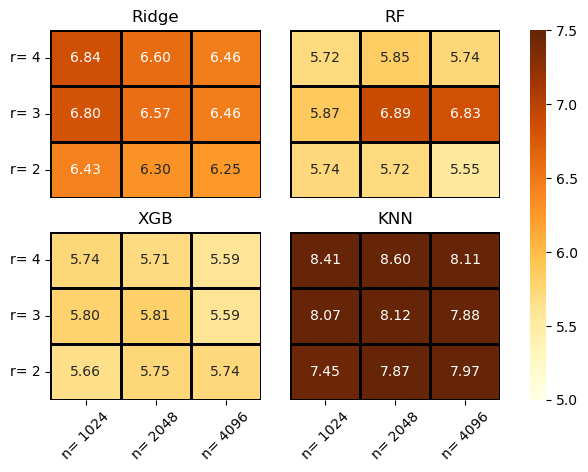

<Figure size 1000x1000 with 0 Axes>

In [46]:
import seaborn as sns
f,((ax1,ax2, axcb),(ax3,ax4, axcb2)) = plt.subplots(2,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]})
#ax1.get_shared_y_axes().join(ax2,ax3,ax4,ax5,ax6)
#axcb.get_shared_y_axes().join(axcb2)
gs = axcb2.get_gridspec()
axcb2.remove()
axcb.remove()
axbig = f.add_subplot(gs[0:, -1])

Error_metric = "MAPE(%)"
#Error_metric = "MAE"
#Error_metric = "R2"

Color_code = "YlOrBr"
#Color_code = "YlOrBr_r"

v_min = 5.0
v_max = 7.5

show_decimal = ".2f"
#show_decimal = ".3f"

g1=Plot_heatmap("Test", "Ridge", ax1, Error_metric, Color_code, v_min, v_max, show_decimal)
g2=Plot_heatmap("Test", "RF", ax2, Error_metric, Color_code, v_min, v_max, show_decimal)
g3=Plot_heatmap_2("Test", "XGB", ax3, Error_metric, Color_code, v_min, v_max, show_decimal)
g4=Plot_heatmap_final("Test", "KNN", ax4, axbig, Error_metric, Color_code, v_min, v_max, show_decimal)


#ax5.set_xlabel('')
#ax5.set_ylabel('')
#ax5.get_xaxis().set_visible(False)
#ax5.get_yaxis().set_visible(False)
g2.get_yaxis().set_visible(False)
g4.get_yaxis().set_visible(False)
#g5.get_yaxis().set_visible(False)
for ax in [g1,g2,g3,g4]:
    ax.set_xlabel('')
    ax.set_ylabel('')
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=45)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
fig = plt.figure(figsize=(10,10))
fig.set_dpi(100)
plt.show()



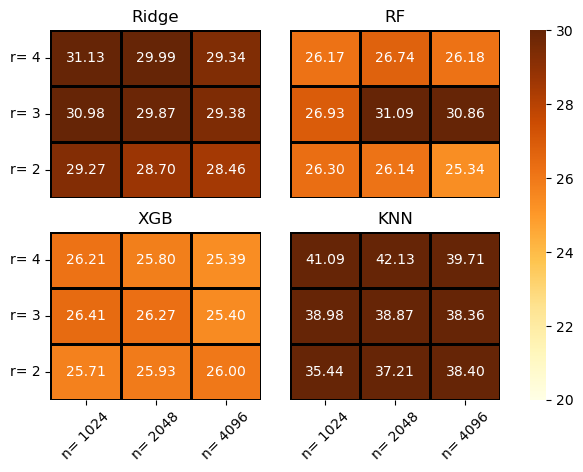

<Figure size 1000x1000 with 0 Axes>

In [47]:
import seaborn as sns
f,((ax1,ax2, axcb),(ax3,ax4, axcb2)) = plt.subplots(2,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]})
#ax1.get_shared_y_axes().join(ax2,ax3,ax4,ax5,ax6)
#axcb.get_shared_y_axes().join(axcb2)
gs = axcb2.get_gridspec()
axcb2.remove()
axcb.remove()
axbig = f.add_subplot(gs[0:, -1])

#Error_metric = "MAPE(%)"
Error_metric = "MAE"
#Error_metric = "R2"

Color_code = "YlOrBr"
#Color_code = "YlOrBr_r"

v_min = 20.0
v_max = 30.0

show_decimal = ".2f"
#show_decimal = ".3f"

g1=Plot_heatmap("Test", "Ridge", ax1, Error_metric, Color_code, v_min, v_max, show_decimal)
g2=Plot_heatmap("Test", "RF", ax2, Error_metric, Color_code, v_min, v_max, show_decimal)
g3=Plot_heatmap_2("Test", "XGB", ax3, Error_metric, Color_code, v_min, v_max, show_decimal)
g4=Plot_heatmap_final("Test", "KNN", ax4, axbig, Error_metric, Color_code, v_min, v_max, show_decimal)


#ax5.set_xlabel('')
#ax5.set_ylabel('')
#ax5.get_xaxis().set_visible(False)
#ax5.get_yaxis().set_visible(False)
g2.get_yaxis().set_visible(False)
g4.get_yaxis().set_visible(False)
#g5.get_yaxis().set_visible(False)
for ax in [g1,g2,g3,g4]:
    ax.set_xlabel('')
    ax.set_ylabel('')
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=45)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
fig = plt.figure(figsize=(10,10))
fig.set_dpi(100)
plt.show()



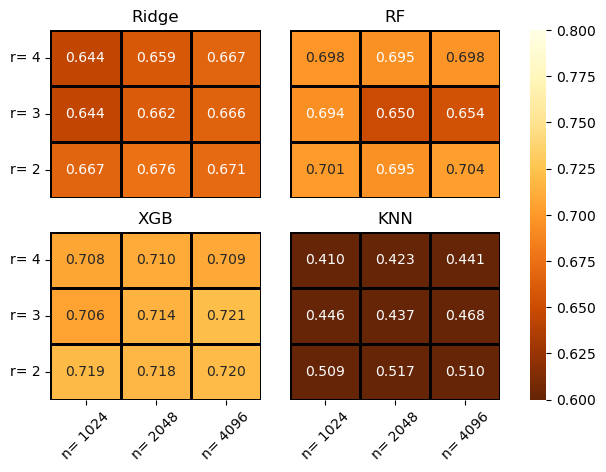

<Figure size 1000x1000 with 0 Axes>

In [48]:
import seaborn as sns
f,((ax1,ax2, axcb),(ax3,ax4, axcb2)) = plt.subplots(2,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]})
#ax1.get_shared_y_axes().join(ax2,ax3,ax4,ax5,ax6)
#axcb.get_shared_y_axes().join(axcb2)
gs = axcb2.get_gridspec()
axcb2.remove()
axcb.remove()
axbig = f.add_subplot(gs[0:, -1])

#Error_metric = "MAPE(%)"
#Error_metric = "MAE"
Error_metric = "R2"

#Color_code = "YlOrBr"
Color_code = "YlOrBr_r"

v_min = 0.6
v_max = 0.8

#show_decimal = ".1f"
show_decimal = ".3f"

g1=Plot_heatmap("Test", "Ridge", ax1, Error_metric, Color_code, v_min, v_max, show_decimal)
g2=Plot_heatmap("Test", "RF", ax2, Error_metric, Color_code, v_min, v_max, show_decimal)
g3=Plot_heatmap_2("Test", "XGB", ax3, Error_metric, Color_code, v_min, v_max, show_decimal)
g4=Plot_heatmap_final("Test", "KNN", ax4, axbig, Error_metric, Color_code, v_min, v_max, show_decimal)


#ax5.set_xlabel('')
#ax5.set_ylabel('')
#ax5.get_xaxis().set_visible(False)
#ax5.get_yaxis().set_visible(False)
g2.get_yaxis().set_visible(False)
g4.get_yaxis().set_visible(False)
#g5.get_yaxis().set_visible(False)
for ax in [g1,g2,g3,g4]:
    ax.set_xlabel('')
    ax.set_ylabel('')
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=45)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
fig = plt.figure(figsize=(10,10))
fig.set_dpi(100)
plt.show()



# Function

In [49]:
import seaborn as sns
import pandas as pd
df_visual = pd.read_excel("../../NEW/C-MF 2023-11-11/All2.xlsx", sheet_name="show12")


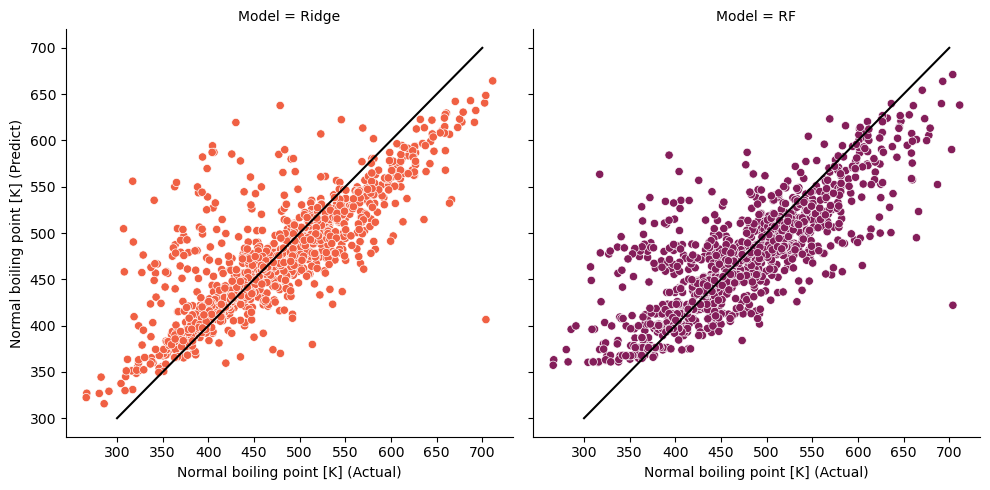

In [50]:
g= sns.relplot(
    data=df_visual, x="Normal boiling point [K] (Actual)", y="Normal boiling point [K] (Predict)",
    col="Model", col_wrap=2,
    hue="Model",
    #style="Model",
    palette="rocket_r",
    kind="scatter", 
    legend=False,
    aspect=1
    
)

axes = g.fig.axes
x = np.arange(300, 750, 50)
y = np.arange(300, 750, 50)
for ax in axes:
    ax.plot(x, y,"k-")
    ax.set_xticks(np.arange(300, 750, 50))
plt.show()

In [51]:
import seaborn as sns
import pandas as pd
df_visual = pd.read_excel("../../NEW/C-MF 2023-11-11/All2.xlsx", sheet_name="show34")


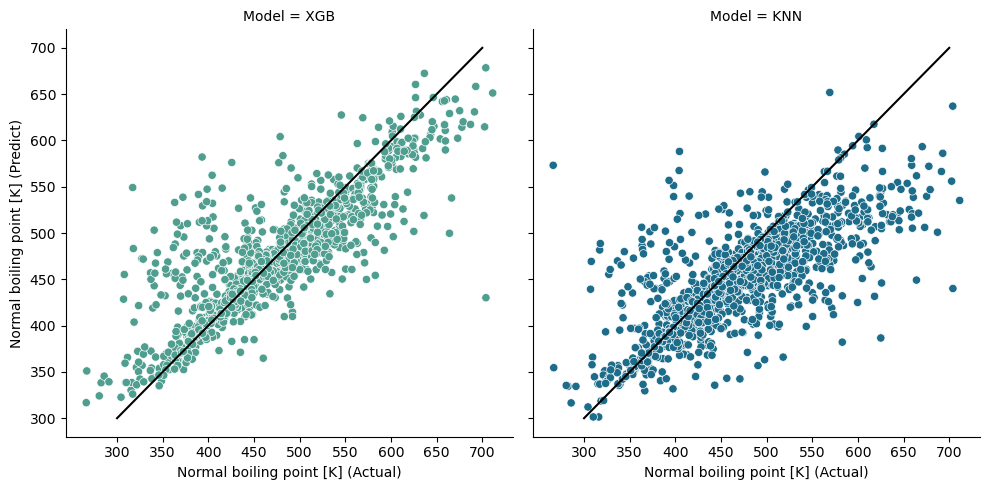

In [52]:
g= sns.relplot(
    data=df_visual, x="Normal boiling point [K] (Actual)", y="Normal boiling point [K] (Predict)",
    col="Model", col_wrap=2,
    hue="Model",
    #style="Model",
    palette="crest",
    kind="scatter", 
    legend=False,
    aspect=1
    
)

axes = g.fig.axes
x = np.arange(300, 750, 50)
y = np.arange(300, 750, 50)
for ax in axes:
    ax.plot(x, y,"k-")
    ax.set_xticks(np.arange(300, 750, 50))
plt.show()

# X=Y All

In [53]:
import seaborn as sns
import pandas as pd
df_visual = pd.read_excel("../../NEW/C-MF 2023-11-11/All2.xlsx", sheet_name="show")


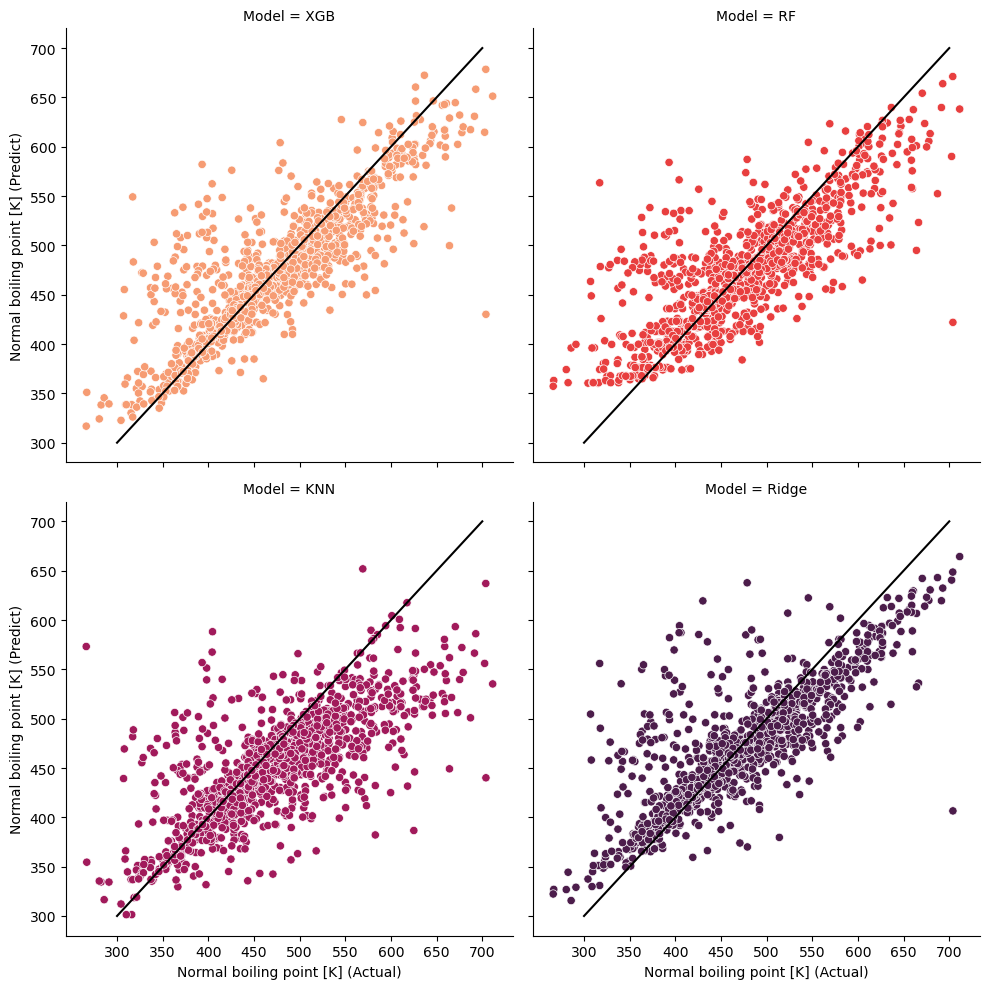

In [54]:
g= sns.relplot(
    data=df_visual, x="Normal boiling point [K] (Actual)", y="Normal boiling point [K] (Predict)",
    col="Model", col_wrap=2,
    hue="Model",
    #style="Model",
    palette="rocket_r",
    kind="scatter", 
    legend=False,
    aspect=1
    
)

axes = g.fig.axes
x = np.arange(300, 750, 50)
y = np.arange(300, 750, 50)
for ax in axes:
    ax.plot(x, y,"k-")
    ax.set_xticks(np.arange(300, 750, 50))
plt.show()

# Histogram Predict Error

In [55]:
import seaborn as sns
import pandas as pd
df_visual = pd.read_excel("../../Test_Data_Visualization.xlsx", sheet_name="showCH")


<Axes: xlabel='Error Normal Boiling Point [K]', ylabel='Count'>

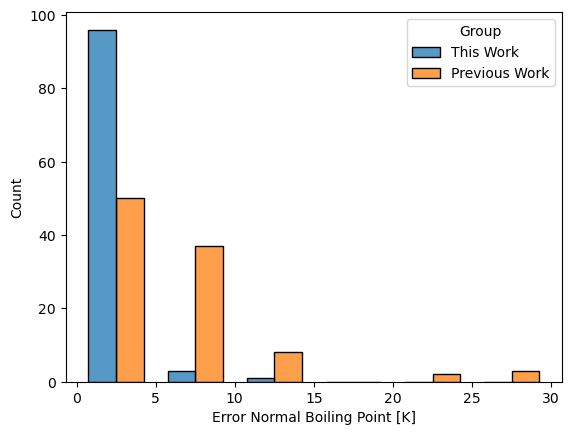

In [56]:
import seaborn as sns

colors = {'G1': 'brown', 'G2': 'green'}

# Histogram
sns.histplot(data = df_visual,
             x = "Error Normal Boiling Point [K]", hue = "Group"
             , multiple="dodge",shrink=.7
             ,binwidth=5
             ,binrange=[0,30]
            # ,palette = colors
            )

In [57]:
df_visual

,Group,Error Normal Boiling Point [K]
0,This Work,0.262400
1,This Work,0.281500
2,This Work,0.878670
3,This Work,0.277700
4,This Work,0.194240
...,...,...
195,Previous Work,13.829801
196,Previous Work,26.670212
197,Previous Work,4.835212
198,Previous Work,5.435212


# Histogram Predict Error

In [58]:
import seaborn as sns
import pandas as pd
df_visual = pd.read_excel("../../NEW/C-MF 2023-11-11/All2.xlsx", sheet_name="showML_HIST")


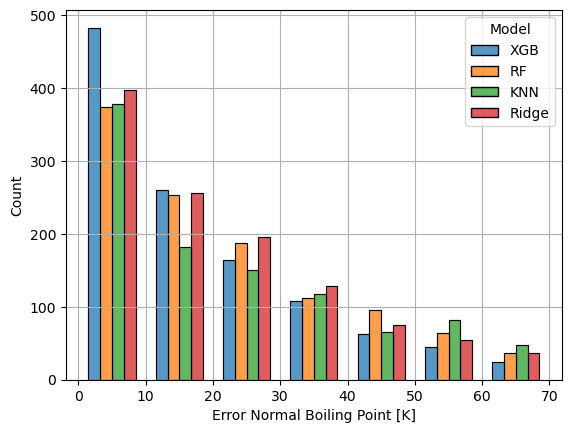

In [63]:
import seaborn as sns

colors = {'G1': 'brown', 'G2': 'green'}

# Histogram
g4 = sns.histplot(data = df_visual,
             x = "Error Normal Boiling Point [K]", hue = "Model"
             , multiple="dodge",shrink=.7
             ,binwidth=10
             ,binrange=[0,70]
            # ,palette = colors
            )
#grid()
g4.grid()